In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Data_Train.csv')
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [4]:
df1.shape

(10683, 11)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df1['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
29h 10m      1
35h 35m      1
41h 20m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df1[df1['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df1.dropna(inplace=True)

In [10]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df1['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [12]:
Date = df1['Date_of_Journey'].str.split('/',expand=True)
Date.columns=['Day','Month','Year']

In [13]:
Date

,Day,Month,Year
0,24,03,2019
1,1,05,2019
2,9,06,2019
3,12,05,2019
4,01,03,2019
...,...,...,...
10678,9,04,2019
10679,27,04,2019
10680,27,04,2019
10681,01,03,2019


In [14]:
df1=pd.concat([df1,Date],axis=1)
df1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019


In [15]:
df1['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [16]:
df1=df1.drop(columns=['Date_of_Journey'])
df1.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [17]:
df1['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:50      1
04:15      1
21:40      1
16:25      1
21:35      1
Name: Dep_Time, Length: 222, dtype: int64

In [18]:
df1['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [19]:
Departure=df1['Dep_Time'].str.split(':',expand=True)
Departure.columns=['Dep_Hours','Dep_Mins']
Departure

,Dep_Hours,Dep_Mins
0,22,20
1,05,50
2,09,25
3,18,05
4,16,50
...,...,...
10678,19,55
10679,20,45
10680,08,20
10681,11,30


In [20]:
df1=pd.concat([df1,Departure],axis=1)
df1.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50


In [21]:
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
df1.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50


In [23]:
df1['Year'].unique()

array(['2019'], dtype=object)

In [24]:
df1['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [25]:
arrival=df1['Arrival_Time'].str.split(':',expand=True)
arrival.columns=['Arrival_hours','Arrival_min']
arrival.head(2)

,Arrival_hours,Arrival_min
0,01,10 22 Mar
1,13,15


In [26]:
df1['Arrival_hour']=pd.to_datetime(df1.Arrival_Time).dt.hour
df1['Arrival_min']=pd.to_datetime(df1.Arrival_Time).dt.minute
df1.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15


In [27]:
df1.drop(['Arrival_Time'],axis=1,inplace=True)

In [28]:
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15


In [29]:
df1.Year.unique()

array(['2019'], dtype=object)

In [30]:
df1.drop(['Year'],axis=1,inplace=True)

In [31]:
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15


In [32]:
df1['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [33]:
len(df1['Duration'].str.split())

10682

In [34]:
len('29h 30m'.split())

2

In [35]:
len('5m'.split())

1

In [36]:
len('29h'.split())

1

In [37]:
x=0
d1=[]
for i in df1['Duration']:
    if len(i.split())!=2:
        #print(i)
        if('m' in i):
            i='0h '+i
            d1.append(i)
            print(i)
            print(len(i.split()))
        else:
            i=i+' 0m'
            d1.append(i)
            print(len(i.split()))
    else:
        d1.append(i)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [38]:
len(df1['Duration'])

10682

In [39]:
len(d1[0].split())

2

In [40]:
d1[0]

'2h 50m'

In [41]:
(d1[0].split()[1]).split(sep='m')[0]

'50'

In [42]:
duration_hour=[]
duration_min=[]
for x in range(len(d1)):
    print("hours:",d1[x].split()[0],"min:",d1[x].split()[1])
    duration_hour.append(d1[x].split(sep='h')[0])
    duration_min.append((d1[x].split()[1]).split(sep='m')[0])
    
    

hours: 2h min: 50m
hours: 7h min: 25m
hours: 19h min: 0m
hours: 5h min: 25m
hours: 4h min: 45m
hours: 2h min: 25m
hours: 15h min: 30m
hours: 21h min: 5m
hours: 25h min: 30m
hours: 7h min: 50m
hours: 13h min: 15m
hours: 2h min: 35m
hours: 2h min: 15m
hours: 12h min: 10m
hours: 2h min: 35m
hours: 26h min: 35m
hours: 4h min: 30m
hours: 22h min: 35m
hours: 23h min: 0m
hours: 20h min: 35m
hours: 5h min: 10m
hours: 15h min: 20m
hours: 2h min: 50m
hours: 2h min: 55m
hours: 13h min: 20m
hours: 15h min: 10m
hours: 5h min: 45m
hours: 5h min: 55m
hours: 2h min: 50m
hours: 2h min: 15m
hours: 2h min: 15m
hours: 13h min: 25m
hours: 2h min: 50m
hours: 22h min: 0m
hours: 5h min: 30m
hours: 10h min: 25m
hours: 5h min: 15m
hours: 2h min: 30m
hours: 6h min: 15m
hours: 11h min: 55m
hours: 11h min: 5m
hours: 8h min: 30m
hours: 22h min: 5m
hours: 2h min: 45m
hours: 12h min: 0m
hours: 2h min: 50m
hours: 2h min: 50m
hours: 2h min: 15m
hours: 16h min: 5m
hours: 19h min: 55m
hours: 3h min: 15m
hours: 25h min: 2

hours: 12h min: 25m
hours: 7h min: 35m
hours: 2h min: 50m
hours: 4h min: 35m
hours: 11h min: 15m
hours: 2h min: 35m
hours: 26h min: 0m
hours: 2h min: 25m
hours: 2h min: 35m
hours: 14h min: 15m
hours: 2h min: 35m
hours: 22h min: 5m
hours: 6h min: 35m
hours: 8h min: 30m
hours: 18h min: 45m
hours: 35h min: 15m
hours: 2h min: 15m
hours: 2h min: 30m
hours: 2h min: 20m
hours: 2h min: 30m
hours: 7h min: 35m
hours: 35h min: 35m
hours: 26h min: 30m
hours: 11h min: 30m
hours: 26h min: 40m
hours: 3h min: 0m
hours: 1h min: 30m
hours: 2h min: 55m
hours: 14h min: 15m
hours: 16h min: 55m
hours: 12h min: 20m
hours: 29h min: 35m
hours: 20h min: 20m
hours: 8h min: 25m
hours: 13h min: 50m
hours: 10h min: 0m
hours: 19h min: 25m
hours: 28h min: 0m
hours: 2h min: 50m
hours: 17h min: 20m
hours: 2h min: 45m
hours: 2h min: 55m
hours: 13h min: 25m
hours: 12h min: 55m
hours: 9h min: 45m
hours: 21h min: 25m
hours: 15h min: 40m
hours: 2h min: 20m
hours: 14h min: 25m
hours: 2h min: 50m
hours: 6h min: 35m
hours: 22h

hours: 2h min: 30m
hours: 4h min: 55m
hours: 8h min: 25m
hours: 4h min: 35m
hours: 3h min: 5m
hours: 10h min: 25m
hours: 1h min: 15m
hours: 13h min: 15m
hours: 22h min: 55m
hours: 5h min: 55m
hours: 2h min: 55m
hours: 2h min: 45m
hours: 2h min: 55m
hours: 2h min: 30m
hours: 26h min: 30m
hours: 25h min: 55m
hours: 1h min: 20m
hours: 2h min: 40m
hours: 1h min: 35m
hours: 2h min: 20m
hours: 2h min: 40m
hours: 4h min: 35m
hours: 3h min: 5m
hours: 15h min: 10m
hours: 2h min: 55m
hours: 9h min: 5m
hours: 15h min: 25m
hours: 4h min: 40m
hours: 9h min: 35m
hours: 4h min: 35m
hours: 30h min: 55m
hours: 2h min: 55m
hours: 37h min: 20m
hours: 26h min: 0m
hours: 20h min: 10m
hours: 25h min: 20m
hours: 11h min: 5m
hours: 23h min: 50m
hours: 10h min: 0m
hours: 2h min: 35m
hours: 20h min: 35m
hours: 14h min: 50m
hours: 2h min: 20m
hours: 9h min: 50m
hours: 7h min: 30m
hours: 7h min: 15m
hours: 22h min: 45m
hours: 2h min: 50m
hours: 20h min: 10m
hours: 2h min: 50m
hours: 22h min: 55m
hours: 25h min: 2

hours: 2h min: 20m
hours: 10h min: 40m
hours: 23h min: 25m
hours: 6h min: 10m
hours: 3h min: 0m
hours: 7h min: 35m
hours: 28h min: 0m
hours: 5h min: 25m
hours: 7h min: 15m
hours: 12h min: 30m
hours: 9h min: 0m
hours: 15h min: 25m
hours: 2h min: 35m
hours: 8h min: 25m
hours: 7h min: 15m
hours: 15h min: 20m
hours: 9h min: 50m
hours: 1h min: 30m
hours: 16h min: 45m
hours: 2h min: 45m
hours: 15h min: 20m
hours: 2h min: 35m
hours: 14h min: 30m
hours: 2h min: 50m
hours: 9h min: 10m
hours: 18h min: 20m
hours: 22h min: 55m
hours: 1h min: 30m
hours: 2h min: 45m
hours: 15h min: 30m
hours: 15h min: 20m
hours: 3h min: 0m
hours: 7h min: 40m
hours: 10h min: 35m
hours: 10h min: 45m
hours: 10h min: 15m
hours: 17h min: 10m
hours: 12h min: 30m
hours: 8h min: 0m
hours: 11h min: 5m
hours: 2h min: 55m
hours: 1h min: 30m
hours: 10h min: 55m
hours: 2h min: 30m
hours: 24h min: 20m
hours: 2h min: 55m
hours: 1h min: 30m
hours: 13h min: 15m
hours: 4h min: 40m
hours: 13h min: 0m
hours: 16h min: 0m
hours: 17h min:

hours: 16h min: 10m
hours: 2h min: 25m
hours: 2h min: 50m
hours: 11h min: 30m
hours: 2h min: 50m
hours: 23h min: 40m
hours: 27h min: 0m
hours: 3h min: 15m
hours: 11h min: 30m
hours: 2h min: 30m
hours: 2h min: 45m
hours: 10h min: 0m
hours: 5h min: 15m
hours: 23h min: 5m
hours: 2h min: 50m
hours: 12h min: 20m
hours: 9h min: 45m
hours: 8h min: 35m
hours: 2h min: 45m
hours: 1h min: 30m
hours: 18h min: 25m
hours: 2h min: 45m
hours: 2h min: 30m
hours: 6h min: 35m
hours: 13h min: 30m
hours: 11h min: 5m
hours: 26h min: 10m
hours: 5h min: 45m
hours: 7h min: 35m
hours: 6h min: 45m
hours: 2h min: 45m
hours: 12h min: 40m
hours: 7h min: 15m
hours: 11h min: 40m
hours: 2h min: 15m
hours: 12h min: 45m
hours: 2h min: 50m
hours: 1h min: 25m
hours: 18h min: 0m
hours: 2h min: 45m
hours: 12h min: 55m
hours: 15h min: 0m
hours: 1h min: 15m
hours: 24h min: 40m
hours: 1h min: 30m
hours: 13h min: 30m
hours: 2h min: 55m
hours: 2h min: 25m
hours: 20h min: 10m
hours: 12h min: 10m
hours: 12h min: 15m
hours: 24h min

hours: 24h min: 0m
hours: 20h min: 55m
hours: 6h min: 5m
hours: 12h min: 15m
hours: 2h min: 30m
hours: 2h min: 35m
hours: 12h min: 30m
hours: 12h min: 35m
hours: 16h min: 5m
hours: 21h min: 15m
hours: 2h min: 20m
hours: 2h min: 30m
hours: 12h min: 15m
hours: 23h min: 50m
hours: 2h min: 50m
hours: 23h min: 10m
hours: 8h min: 5m
hours: 10h min: 40m
hours: 2h min: 30m
hours: 7h min: 15m
hours: 1h min: 30m
hours: 10h min: 30m
hours: 23h min: 15m
hours: 2h min: 30m
hours: 5h min: 0m
hours: 25h min: 5m
hours: 9h min: 45m
hours: 2h min: 25m
hours: 15h min: 25m
hours: 13h min: 30m
hours: 20h min: 15m
hours: 15h min: 30m
hours: 15h min: 0m
hours: 21h min: 30m
hours: 7h min: 5m
hours: 2h min: 55m
hours: 28h min: 20m
hours: 2h min: 30m
hours: 18h min: 10m
hours: 21h min: 15m
hours: 11h min: 5m
hours: 10h min: 40m
hours: 10h min: 0m
hours: 4h min: 50m
hours: 5h min: 30m
hours: 13h min: 20m
hours: 9h min: 30m
hours: 26h min: 45m
hours: 9h min: 15m
hours: 1h min: 15m
hours: 7h min: 35m
hours: 1h min

hours: 1h min: 30m
hours: 11h min: 35m
hours: 2h min: 20m
hours: 7h min: 20m
hours: 6h min: 25m
hours: 3h min: 0m
hours: 11h min: 0m
hours: 14h min: 30m
hours: 12h min: 20m
hours: 13h min: 15m
hours: 11h min: 0m
hours: 2h min: 45m
hours: 25h min: 30m
hours: 12h min: 0m
hours: 15h min: 25m
hours: 1h min: 25m
hours: 7h min: 15m
hours: 2h min: 35m
hours: 16h min: 35m
hours: 2h min: 55m
hours: 1h min: 30m
hours: 10h min: 45m
hours: 7h min: 45m
hours: 4h min: 45m
hours: 12h min: 15m
hours: 19h min: 25m
hours: 2h min: 35m
hours: 27h min: 20m
hours: 2h min: 20m
hours: 10h min: 30m
hours: 25h min: 5m
hours: 11h min: 15m
hours: 24h min: 50m
hours: 19h min: 50m
hours: 2h min: 15m
hours: 5h min: 10m
hours: 29h min: 5m
hours: 26h min: 0m
hours: 9h min: 30m
hours: 2h min: 35m
hours: 2h min: 15m
hours: 15h min: 55m
hours: 2h min: 15m
hours: 16h min: 5m
hours: 23h min: 50m
hours: 4h min: 50m
hours: 16h min: 45m
hours: 2h min: 20m
hours: 15h min: 0m
hours: 14h min: 5m
hours: 13h min: 20m
hours: 12h mi

hours: 23h min: 30m
hours: 10h min: 40m
hours: 2h min: 55m
hours: 9h min: 50m
hours: 2h min: 15m
hours: 28h min: 5m
hours: 17h min: 50m
hours: 16h min: 30m
hours: 25h min: 45m
hours: 22h min: 45m
hours: 2h min: 50m
hours: 11h min: 45m
hours: 1h min: 30m
hours: 16h min: 45m
hours: 9h min: 5m
hours: 5h min: 30m
hours: 7h min: 15m
hours: 17h min: 25m
hours: 13h min: 30m
hours: 6h min: 30m
hours: 2h min: 50m
hours: 2h min: 55m
hours: 2h min: 50m
hours: 2h min: 20m
hours: 2h min: 30m
hours: 12h min: 10m
hours: 8h min: 30m
hours: 2h min: 50m
hours: 2h min: 45m
hours: 3h min: 0m
hours: 16h min: 0m
hours: 2h min: 35m
hours: 2h min: 25m
hours: 23h min: 35m
hours: 22h min: 55m
hours: 2h min: 15m
hours: 3h min: 15m
hours: 6h min: 5m
hours: 5h min: 5m
hours: 2h min: 20m
hours: 26h min: 35m
hours: 1h min: 30m
hours: 2h min: 45m
hours: 2h min: 50m
hours: 11h min: 25m
hours: 18h min: 50m
hours: 2h min: 35m
hours: 14h min: 20m
hours: 2h min: 45m
hours: 12h min: 10m
hours: 5h min: 0m
hours: 11h min: 0m

hours: 6h min: 35m
hours: 21h min: 20m
hours: 3h min: 55m
hours: 2h min: 50m
hours: 12h min: 45m
hours: 2h min: 50m
hours: 6h min: 35m
hours: 2h min: 20m
hours: 2h min: 55m
hours: 2h min: 20m
hours: 12h min: 0m
hours: 14h min: 25m
hours: 2h min: 15m
hours: 13h min: 30m
hours: 25h min: 45m
hours: 2h min: 50m
hours: 24h min: 50m
hours: 12h min: 35m
hours: 11h min: 50m
hours: 26h min: 55m
hours: 8h min: 50m
hours: 19h min: 25m
hours: 12h min: 15m
hours: 7h min: 35m
hours: 19h min: 30m
hours: 5h min: 20m
hours: 8h min: 20m
hours: 2h min: 45m
hours: 28h min: 50m
hours: 13h min: 20m
hours: 23h min: 45m
hours: 19h min: 0m
hours: 22h min: 30m
hours: 2h min: 35m
hours: 2h min: 15m
hours: 5h min: 30m
hours: 2h min: 35m
hours: 39h min: 5m
hours: 9h min: 0m
hours: 12h min: 30m
hours: 4h min: 25m
hours: 8h min: 55m
hours: 12h min: 0m
hours: 9h min: 15m
hours: 2h min: 35m
hours: 16h min: 0m
hours: 27h min: 40m
hours: 6h min: 30m
hours: 12h min: 10m
hours: 5h min: 15m
hours: 2h min: 50m
hours: 12h mi

hours: 8h min: 20m
hours: 25h min: 35m
hours: 2h min: 15m
hours: 14h min: 0m
hours: 2h min: 50m
hours: 24h min: 55m
hours: 14h min: 30m
hours: 13h min: 0m
hours: 1h min: 15m
hours: 7h min: 35m
hours: 27h min: 40m
hours: 2h min: 50m
hours: 7h min: 20m
hours: 1h min: 30m
hours: 2h min: 55m
hours: 2h min: 30m
hours: 26h min: 20m
hours: 2h min: 40m
hours: 3h min: 0m
hours: 2h min: 35m
hours: 25h min: 55m
hours: 6h min: 30m
hours: 12h min: 25m
hours: 5h min: 15m
hours: 21h min: 10m
hours: 2h min: 45m
hours: 3h min: 0m
hours: 29h min: 5m
hours: 2h min: 55m
hours: 15h min: 30m
hours: 7h min: 5m
hours: 18h min: 45m
hours: 2h min: 15m
hours: 2h min: 40m
hours: 7h min: 50m
hours: 27h min: 40m
hours: 24h min: 40m
hours: 7h min: 15m
hours: 12h min: 25m
hours: 6h min: 15m
hours: 8h min: 0m
hours: 6h min: 10m
hours: 21h min: 40m
hours: 15h min: 20m
hours: 9h min: 45m
hours: 23h min: 50m
hours: 13h min: 25m
hours: 14h min: 5m
hours: 13h min: 0m
hours: 2h min: 35m
hours: 3h min: 15m
hours: 9h min: 30m

hours: 2h min: 25m
hours: 2h min: 30m
hours: 16h min: 5m
hours: 23h min: 10m
hours: 2h min: 45m
hours: 6h min: 20m
hours: 15h min: 30m
hours: 12h min: 10m
hours: 1h min: 30m
hours: 10h min: 25m
hours: 12h min: 40m
hours: 8h min: 35m
hours: 7h min: 20m
hours: 23h min: 40m
hours: 1h min: 25m
hours: 15h min: 30m
hours: 16h min: 50m
hours: 2h min: 50m
hours: 18h min: 0m
hours: 7h min: 20m
hours: 17h min: 55m
hours: 2h min: 50m
hours: 38h min: 15m
hours: 16h min: 45m
hours: 9h min: 50m
hours: 6h min: 35m
hours: 13h min: 45m
hours: 27h min: 45m
hours: 6h min: 20m
hours: 5h min: 45m
hours: 2h min: 55m
hours: 5h min: 20m
hours: 1h min: 30m
hours: 12h min: 0m
hours: 15h min: 10m
hours: 5h min: 5m
hours: 2h min: 50m
hours: 7h min: 20m
hours: 14h min: 25m
hours: 2h min: 35m
hours: 3h min: 0m
hours: 2h min: 55m
hours: 25h min: 50m
hours: 16h min: 50m
hours: 2h min: 35m
hours: 38h min: 20m
hours: 14h min: 0m
hours: 16h min: 10m
hours: 11h min: 15m
hours: 13h min: 15m
hours: 1h min: 30m
hours: 2h mi

hours: 1h min: 25m
hours: 2h min: 50m
hours: 8h min: 20m
hours: 3h min: 5m
hours: 23h min: 40m
hours: 2h min: 20m
hours: 22h min: 55m
hours: 23h min: 40m
hours: 5h min: 40m
hours: 2h min: 30m
hours: 20h min: 55m
hours: 3h min: 5m
hours: 13h min: 20m
hours: 2h min: 20m
hours: 1h min: 25m
hours: 2h min: 35m
hours: 3h min: 40m
hours: 26h min: 55m
hours: 7h min: 30m
hours: 11h min: 0m
hours: 27h min: 20m
hours: 2h min: 50m
hours: 38h min: 0m
hours: 19h min: 25m
hours: 13h min: 30m
hours: 3h min: 0m
hours: 27h min: 0m
hours: 4h min: 55m
hours: 6h min: 0m
hours: 10h min: 25m
hours: 12h min: 30m
hours: 3h min: 0m
hours: 8h min: 5m
hours: 2h min: 20m
hours: 13h min: 20m
hours: 5h min: 25m
hours: 19h min: 5m
hours: 2h min: 45m
hours: 14h min: 30m
hours: 24h min: 5m
hours: 1h min: 30m
hours: 26h min: 55m
hours: 2h min: 20m
hours: 23h min: 40m
hours: 8h min: 30m
hours: 23h min: 30m
hours: 8h min: 0m
hours: 30h min: 20m
hours: 2h min: 50m
hours: 23h min: 30m
hours: 22h min: 55m
hours: 29h min: 55m

hours: 8h min: 15m
hours: 12h min: 30m
hours: 8h min: 30m
hours: 11h min: 50m
hours: 10h min: 30m
hours: 12h min: 10m
hours: 5h min: 0m
hours: 2h min: 35m
hours: 17h min: 25m
hours: 5h min: 10m
hours: 9h min: 30m
hours: 10h min: 40m
hours: 8h min: 40m
hours: 9h min: 40m
hours: 2h min: 15m
hours: 11h min: 15m
hours: 23h min: 30m
hours: 8h min: 40m
hours: 6h min: 20m
hours: 23h min: 50m
hours: 12h min: 55m
hours: 5h min: 0m
hours: 13h min: 15m
hours: 2h min: 30m
hours: 7h min: 0m
hours: 6h min: 35m
hours: 18h min: 10m
hours: 21h min: 25m
hours: 24h min: 55m
hours: 2h min: 50m
hours: 13h min: 15m
hours: 22h min: 10m
hours: 2h min: 45m
hours: 14h min: 25m
hours: 2h min: 20m
hours: 2h min: 30m
hours: 7h min: 30m
hours: 5h min: 45m
hours: 21h min: 25m
hours: 1h min: 30m
hours: 7h min: 15m
hours: 12h min: 30m
hours: 23h min: 15m
hours: 12h min: 5m
hours: 10h min: 55m
hours: 25h min: 20m
hours: 1h min: 30m
hours: 2h min: 55m
hours: 4h min: 0m
hours: 20h min: 10m
hours: 13h min: 0m
hours: 2h mi

hours: 14h min: 45m
hours: 6h min: 10m
hours: 2h min: 45m
hours: 7h min: 40m
hours: 1h min: 30m
hours: 14h min: 25m
hours: 11h min: 30m
hours: 3h min: 15m
hours: 8h min: 30m
hours: 2h min: 15m
hours: 2h min: 45m
hours: 4h min: 30m
hours: 3h min: 40m
hours: 14h min: 0m
hours: 1h min: 30m
hours: 9h min: 25m
hours: 2h min: 15m
hours: 2h min: 55m
hours: 13h min: 20m
hours: 2h min: 20m
hours: 6h min: 40m
hours: 11h min: 45m
hours: 4h min: 55m
hours: 8h min: 35m
hours: 16h min: 5m
hours: 5h min: 5m
hours: 6h min: 5m
hours: 6h min: 25m
hours: 9h min: 50m
hours: 1h min: 20m
hours: 19h min: 25m
hours: 9h min: 20m
hours: 16h min: 45m
hours: 8h min: 5m
hours: 2h min: 50m
hours: 17h min: 25m
hours: 2h min: 15m
hours: 19h min: 55m
hours: 14h min: 20m
hours: 6h min: 15m
hours: 12h min: 0m
hours: 5h min: 15m
hours: 22h min: 55m
hours: 3h min: 0m
hours: 13h min: 15m
hours: 26h min: 0m
hours: 26h min: 0m
hours: 15h min: 30m
hours: 3h min: 0m
hours: 2h min: 30m
hours: 24h min: 0m
hours: 20h min: 55m
hou

hours: 9h min: 35m
hours: 17h min: 25m
hours: 10h min: 25m
hours: 17h min: 25m
hours: 2h min: 45m
hours: 7h min: 55m
hours: 24h min: 50m
hours: 13h min: 55m
hours: 10h min: 30m
hours: 10h min: 15m
hours: 13h min: 20m
hours: 8h min: 40m
hours: 9h min: 25m
hours: 3h min: 10m
hours: 3h min: 15m
hours: 7h min: 30m
hours: 3h min: 0m
hours: 2h min: 45m
hours: 7h min: 35m
hours: 2h min: 30m
hours: 21h min: 40m
hours: 2h min: 50m
hours: 26h min: 10m
hours: 16h min: 10m
hours: 3h min: 5m
hours: 1h min: 30m
hours: 21h min: 15m
hours: 26h min: 55m
hours: 26h min: 20m
hours: 23h min: 0m
hours: 2h min: 35m
hours: 22h min: 45m
hours: 24h min: 55m
hours: 2h min: 15m
hours: 8h min: 5m
hours: 10h min: 0m
hours: 3h min: 0m
hours: 23h min: 10m
hours: 5h min: 35m
hours: 23h min: 15m
hours: 1h min: 30m
hours: 15h min: 20m
hours: 9h min: 30m
hours: 8h min: 25m
hours: 10h min: 10m
hours: 1h min: 25m
hours: 27h min: 5m
hours: 22h min: 35m
hours: 14h min: 25m
hours: 4h min: 55m
hours: 24h min: 0m
hours: 30h mi

In [43]:
df1['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [44]:
duration_hour

['2',
 '7',
 '19',
 '5',
 '4',
 '2',
 '15',
 '21',
 '25',
 '7',
 '13',
 '2',
 '2',
 '12',
 '2',
 '26',
 '4',
 '22',
 '23',
 '20',
 '5',
 '15',
 '2',
 '2',
 '13',
 '15',
 '5',
 '5',
 '2',
 '2',
 '2',
 '13',
 '2',
 '22',
 '5',
 '10',
 '5',
 '2',
 '6',
 '11',
 '11',
 '8',
 '22',
 '2',
 '12',
 '2',
 '2',
 '2',
 '16',
 '19',
 '3',
 '25',
 '2',
 '3',
 '2',
 '16',
 '15',
 '2',
 '6',
 '25',
 '12',
 '27',
 '10',
 '10',
 '2',
 '10',
 '2',
 '1',
 '13',
 '2',
 '1',
 '26',
 '7',
 '13',
 '5',
 '2',
 '2',
 '1',
 '19',
 '2',
 '14',
 '2',
 '22',
 '9',
 '10',
 '21',
 '5',
 '18',
 '12',
 '18',
 '9',
 '11',
 '17',
 '13',
 '2',
 '2',
 '2',
 '3',
 '1',
 '16',
 '12',
 '12',
 '7',
 '24',
 '2',
 '8',
 '7',
 '14',
 '30',
 '19',
 '15',
 '2',
 '12',
 '10',
 '5',
 '15',
 '16',
 '10',
 '2',
 '11',
 '2',
 '1',
 '14',
 '20',
 '2',
 '23',
 '18',
 '16',
 '2',
 '2',
 '8',
 '16',
 '3',
 '2',
 '14',
 '23',
 '21',
 '21',
 '2',
 '10',
 '8',
 '8',
 '5',
 '8',
 '11',
 '27',
 '8',
 '20',
 '4',
 '8',
 '2',
 '24',
 '2',
 '12',
 

In [45]:
duration_min

['50',
 '25',
 '0',
 '25',
 '45',
 '25',
 '30',
 '5',
 '30',
 '50',
 '15',
 '35',
 '15',
 '10',
 '35',
 '35',
 '30',
 '35',
 '0',
 '35',
 '10',
 '20',
 '50',
 '55',
 '20',
 '10',
 '45',
 '55',
 '50',
 '15',
 '15',
 '25',
 '50',
 '0',
 '30',
 '25',
 '15',
 '30',
 '15',
 '55',
 '5',
 '30',
 '5',
 '45',
 '0',
 '50',
 '50',
 '15',
 '5',
 '55',
 '15',
 '20',
 '50',
 '0',
 '50',
 '15',
 '5',
 '15',
 '30',
 '5',
 '25',
 '20',
 '15',
 '30',
 '15',
 '25',
 '50',
 '30',
 '20',
 '15',
 '25',
 '30',
 '20',
 '30',
 '0',
 '45',
 '50',
 '30',
 '5',
 '15',
 '50',
 '40',
 '10',
 '35',
 '0',
 '20',
 '25',
 '45',
 '20',
 '0',
 '15',
 '5',
 '30',
 '20',
 '35',
 '25',
 '40',
 '0',
 '25',
 '35',
 '20',
 '15',
 '30',
 '0',
 '45',
 '55',
 '10',
 '30',
 '20',
 '55',
 '0',
 '55',
 '45',
 '10',
 '55',
 '25',
 '5',
 '10',
 '40',
 '55',
 '40',
 '25',
 '5',
 '15',
 '25',
 '10',
 '10',
 '0',
 '50',
 '20',
 '0',
 '55',
 '10',
 '45',
 '0',
 '50',
 '40',
 '15',
 '45',
 '50',
 '0',
 '15',
 '25',
 '35',
 '50',
 '35',
 '2

In [46]:
len(duration_hour[0].split(sep='h'))

1

In [47]:
df1['Duration_hour']=duration_hour
df1['Duration_min']=duration_min

In [48]:
df1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15,7,25


In [49]:
df1.drop(['Duration'],axis=1,inplace=True)

In [50]:
df1.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50


In [51]:
df1.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [52]:
df1.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,05,50,13,15,7,25


In [53]:
df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [54]:
df1=df1.replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})
df1.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,05,05,50,13,15,7,25


In [55]:
df1['Total_Stops'].unique()


array([0, 2, 1, 3, 4], dtype=int64)

In [56]:
df1['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [57]:
df1['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [58]:
df1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Total_Stops    10682 non-null  int64 
 4   Price          10682 non-null  int64 
 5   Day            10682 non-null  object
 6   Month          10682 non-null  object
 7   Dep_Hours      10682 non-null  object
 8   Dep_Mins       10682 non-null  object
 9   Arrival_hour   10682 non-null  int64 
 10  Arrival_min    10682 non-null  int64 
 11  Duration_hour  10682 non-null  object
 12  Duration_min   10682 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [60]:
df1['Day']=pd.to_numeric(df1['Day'])

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Total_Stops    10682 non-null  int64 
 4   Price          10682 non-null  int64 
 5   Day            10682 non-null  int64 
 6   Month          10682 non-null  object
 7   Dep_Hours      10682 non-null  object
 8   Dep_Mins       10682 non-null  object
 9   Arrival_hour   10682 non-null  int64 
 10  Arrival_min    10682 non-null  int64 
 11  Duration_hour  10682 non-null  object
 12  Duration_min   10682 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [62]:
df1['Month']=pd.to_numeric(df1['Month'])
df1['Dep_Hours']=pd.to_numeric(df1['Dep_Hours'])
df1['Dep_Mins']=pd.to_numeric(df1['Dep_Mins'])
df1['Duration_hour']=pd.to_numeric(df1['Duration_hour'])
df1['Duration_min']=pd.to_numeric(df1['Duration_min'])

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Total_Stops    10682 non-null  int64 
 4   Price          10682 non-null  int64 
 5   Day            10682 non-null  int64 
 6   Month          10682 non-null  int64 
 7   Dep_Hours      10682 non-null  int64 
 8   Dep_Mins       10682 non-null  int64 
 9   Arrival_hour   10682 non-null  int64 
 10  Arrival_min    10682 non-null  int64 
 11  Duration_hour  10682 non-null  int64 
 12  Duration_min   10682 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


## Data Analayising

In [107]:
df1.shape

(10682, 13)

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Total_Stops    10682 non-null  int64 
 4   Price          10682 non-null  int64 
 5   Day            10682 non-null  int64 
 6   Month          10682 non-null  int64 
 7   Dep_Hours      10682 non-null  int64 
 8   Dep_Mins       10682 non-null  int64 
 9   Arrival_hour   10682 non-null  int64 
 10  Arrival_min    10682 non-null  int64 
 11  Duration_hour  10682 non-null  int64 
 12  Duration_min   10682 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [109]:
df1.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


### Maximum ticket fare

In [112]:
max_price=df1['Price'].max()
max_price

79512

In [113]:
df1[df1['Price']==max_price]

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
2924,Jet Airways Business,Banglore,New Delhi,1,79512,1,3,5,45,11,25,5,40


### Min Fare

In [115]:
min_fare=df1['Price'].min()
min_fare

1759

In [116]:
df1[df1['Price']==min_fare]

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
4066,SpiceJet,Mumbai,Hyderabad,0,1759,21,3,22,45,0,10,1,25
4274,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,22,45,0,10,1,25
4839,SpiceJet,Mumbai,Hyderabad,0,1759,3,4,22,45,0,15,1,30
10513,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,5,45,7,5,1,20


### Which Airport has the maximum flights

In [117]:
df1['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### List of flights from Delhi

In [118]:
df1[df1['Source']=='Delhi']

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,11,25,19,15,7,50
10,Air India,Delhi,Cochin,1,8907,1,6,9,45,23,0,13,15
15,Air India,Delhi,Cochin,2,14011,3,3,16,40,19,15,26,35
16,SpiceJet,Delhi,Cochin,1,5830,15,4,8,45,13,15,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,Delhi,Cochin,1,9929,15,6,8,0,19,15,11,15
10672,Jet Airways,Delhi,Cochin,2,11150,27,6,23,5,19,0,19,55
10673,Jet Airways,Delhi,Cochin,2,16704,27,5,13,25,4,25,15,0
10676,Multiple carriers,Delhi,Cochin,1,9794,1,5,10,20,19,0,8,40


### List of flights whose destination is Delhi

In [121]:
df1[df1['Destination']=='Delhi']

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
22,IndiGo,Banglore,Delhi,0,3943,3,4,4,0,6,50,2,50
23,IndiGo,Banglore,Delhi,0,4823,1,5,18,55,21,50,2,55
28,Vistara,Banglore,Delhi,0,4668,18,6,9,45,12,35,2,50
32,IndiGo,Banglore,Delhi,0,4423,6,4,4,0,6,50,2,50
43,Air Asia,Banglore,Delhi,0,3383,6,5,11,10,13,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658,Jet Airways,Banglore,Delhi,0,5769,18,6,11,10,14,5,2,55
10659,Vistara,Banglore,Delhi,0,4668,1,5,21,0,23,50,2,50
10664,IndiGo,Banglore,Delhi,0,4823,9,4,18,55,21,50,2,55
10677,SpiceJet,Banglore,Delhi,0,3257,21,5,5,55,8,35,2,40


### List of flights from Kolkata

In [119]:
df1[df1['Source']=='Kolkata']

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25
11,IndiGo,Kolkata,Banglore,0,4174,18,4,20,20,22,55,2,35
13,Jet Airways,Kolkata,Banglore,1,9663,9,5,21,10,9,20,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10662,Air India,Kolkata,Banglore,2,12352,24,3,9,25,5,35,20,10
10665,IndiGo,Kolkata,Banglore,0,4804,27,4,15,15,17,45,2,30
10670,Air India,Kolkata,Banglore,2,11411,12,5,5,50,23,15,17,25
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30


### List of flights whose source is mumbai

In [123]:
df1[df1['Source']=='Mumbai']

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
59,Vistara,Mumbai,Hyderabad,1,12395,6,3,15,40,16,45,25,5
67,Air India,Mumbai,Hyderabad,0,3625,6,5,13,55,15,25,1,30
70,Jet Airways,Mumbai,Hyderabad,0,5678,1,6,7,5,8,30,1,25
77,IndiGo,Mumbai,Hyderabad,0,4049,3,4,6,25,7,55,1,30
98,Jet Airways,Mumbai,Hyderabad,0,8040,18,6,7,5,8,30,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,Jet Airways,Mumbai,Hyderabad,0,4050,18,5,7,5,8,30,1,25
10617,IndiGo,Mumbai,Hyderabad,0,2754,27,5,2,35,4,5,1,30
10655,Jet Airways,Mumbai,Hyderabad,0,5678,3,5,2,55,4,20,1,25
10671,Air India,Mumbai,Hyderabad,0,3100,6,6,21,5,22,25,1,20


### Which airline is most frequent in the list

In [125]:
df1['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Which Indigo flight is from mumbai

In [127]:
df1[(df1['Airline']=='IndiGo')&(df1['Source']=='Mumbai')]

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
77,IndiGo,Mumbai,Hyderabad,0,4049,3,4,6,25,7,55,1,30
275,IndiGo,Mumbai,Hyderabad,0,2754,15,3,21,20,22,45,1,25
300,IndiGo,Mumbai,Hyderabad,0,2754,3,5,2,35,4,5,1,30
374,IndiGo,Mumbai,Hyderabad,0,2754,3,6,19,5,20,35,1,30
501,IndiGo,Mumbai,Hyderabad,0,2227,27,3,20,5,21,35,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10541,IndiGo,Mumbai,Hyderabad,0,12475,1,3,21,20,22,45,1,25
10576,IndiGo,Mumbai,Hyderabad,0,5755,21,6,9,10,10,40,1,30
10588,IndiGo,Mumbai,Hyderabad,0,2227,27,5,20,5,21,40,1,35
10609,IndiGo,Mumbai,Hyderabad,0,2754,12,5,12,0,13,30,1,30


## Defining X and Y

In [64]:
df1.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [65]:
X=df1.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12]].values
X

array([['IndiGo', 'Banglore', 'New Delhi', ..., 10, 2, 50],
       ['Air India', 'Kolkata', 'Banglore', ..., 15, 7, 25],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 25, 19, 0],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 20, 3, 0],
       ['Vistara', 'Banglore', 'New Delhi', ..., 10, 2, 40],
       ['Air India', 'Delhi', 'Cochin', ..., 15, 8, 20]], dtype=object)

In [66]:
Y=df1.iloc[:,4].values
Y

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

## Data Preprocessing

In [67]:
#Encoding Source
from sklearn.preprocessing import LabelEncoder
LE_source=LabelEncoder()
X[:,1]=LE_source.fit_transform(X[:,1])
X

array([['IndiGo', 0, 'New Delhi', ..., 10, 2, 50],
       ['Air India', 3, 'Banglore', ..., 15, 7, 25],
       ['Jet Airways', 2, 'Cochin', ..., 25, 19, 0],
       ...,
       ['Jet Airways', 0, 'Delhi', ..., 20, 3, 0],
       ['Vistara', 0, 'New Delhi', ..., 10, 2, 40],
       ['Air India', 2, 'Cochin', ..., 15, 8, 20]], dtype=object)

In [68]:
#encoding Destination
LE_destination=LabelEncoder()
X[:,2]=LE_destination.fit_transform(X[:,2])
X

array([['IndiGo', 0, 5, ..., 10, 2, 50],
       ['Air India', 3, 0, ..., 15, 7, 25],
       ['Jet Airways', 2, 1, ..., 25, 19, 0],
       ...,
       ['Jet Airways', 0, 2, ..., 20, 3, 0],
       ['Vistara', 0, 5, ..., 10, 2, 40],
       ['Air India', 2, 1, ..., 15, 8, 20]], dtype=object)

In [69]:
#Encoding of Airline
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(sparse=False)
Ohe=OHE.fit_transform(X[:,0].reshape(-1,1))
Ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [70]:
OHE.transform([['Air India']])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [71]:
df1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [72]:
X=np.hstack([Ohe,X[:,1:]])
X


array([[0.0, 0.0, 0.0, ..., 10, 2, 50],
       [0.0, 1.0, 0.0, ..., 15, 7, 25],
       [0.0, 0.0, 0.0, ..., 25, 19, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 20, 3, 0],
       [0.0, 0.0, 0.0, ..., 10, 2, 40],
       [0.0, 1.0, 0.0, ..., 15, 8, 20]], dtype=object)

In [73]:
Y

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.25)


### 1.Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression()

In [76]:
S=[]

In [77]:
a=Lr.score(X_test,Y_test)*100
S.append(a)
print(a)

57.38328803051618


### 2.Polynomial Regression


In [78]:
from sklearn.preprocessing import PolynomialFeatures
X_poly=PolynomialFeatures(degree=2)
X_poly_train=X_poly.fit_transform(X_train)
X_poly_test=X_poly.transform(X_test)


In [79]:
Plr=LinearRegression()
Plr.fit(X_poly_train,Y_train)

LinearRegression()

In [80]:
p=Plr.score(X_poly_test,Y_test)*100
S.append(p)
p

52.235199717755506

### 3.SVM

#### Data Standardization

In [81]:
from sklearn.preprocessing import StandardScaler
Sc_X=StandardScaler()
Sc_X_train=Sc_X.fit_transform(X_train)
Sc_X_test=Sc_X.transform(X_test)

In [82]:
from sklearn.svm import SVR
sv=SVR(kernel='rbf')
sv.fit(Sc_X_train,Y_train)

SVR()

In [83]:
s=sv.score(Sc_X_test,Y_test)*100
S.append(s)
s

4.153947990224493

###  4.Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [85]:
d=dt.score(X_test,Y_test)*100
S.append(d)
d

71.23655356727785

### 5.Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=0,n_estimators=300)
rfr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [87]:
r=rfr.score(X_test,Y_test)*100
S.append(r)
r

81.70517565966053

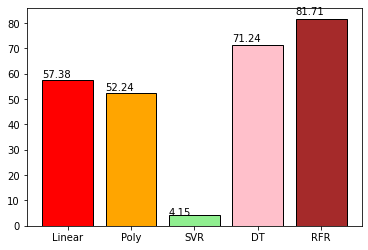

In [88]:
algo=['Linear','Poly','SVR','DT','RFR']
color_list=['red','orange','lightgreen','pink','brown']
a=plt.bar(algo,S,color=color_list,edgecolor='k')
for val in a:
    height=val.get_height()
    plt.text(val.get_x(),1.02*height,round(height,2))

plt.show()

In [89]:
for i in range(10):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)

    from sklearn.ensemble import RandomForestRegressor
    reg5 = RandomForestRegressor(n_estimators=300,random_state=0)

    reg5.fit(X_train,Y_train)


    print(i,reg5.score(X_test,Y_test) * 100)

0 81.70517565966053
1 81.02298154896175
2 78.85619578546476
3 79.85655171028858
4 83.10269867840037
5 82.0718361508742
6 81.06091109844323
7 82.69874705217089
8 80.463182234926
9 82.96903518082969


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=4)

from sklearn.ensemble import RandomForestRegressor
reg5 = RandomForestRegressor(n_estimators=300,random_state=0)

reg5.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [91]:
Yp=reg5.predict(X_test)
Yp

array([11613.92123016, 10869.33571429, 10860.11666667, ...,
       12931.62333333,  9605.82333333,  4364.88833333])

In [92]:
print(X_test[0])

[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3 0 1 24 3 13 55 19 40 5
 45]


In [93]:
len(X_test)

2671

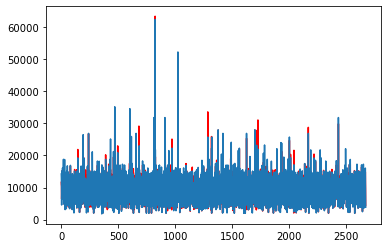

In [94]:
plt.plot(Yp,color='red')
plt.plot(Y_test)
plt.show()

In [95]:
reg5.score(X_test,Y_test)*100

83.10269867840037

In [96]:
X

array([[0.0, 0.0, 0.0, ..., 10, 2, 50],
       [0.0, 1.0, 0.0, ..., 15, 7, 25],
       [0.0, 0.0, 0.0, ..., 25, 19, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 20, 3, 0],
       [0.0, 0.0, 0.0, ..., 10, 2, 40],
       [0.0, 1.0, 0.0, ..., 15, 8, 20]], dtype=object)

In [97]:
df1.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Mins,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [98]:
df1['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [99]:
from tkinter import *
from tkinter import ttk
from PIL import ImageTk, Image
def home():
    #function that get executed when the submit button is pressed
    def submitfunc():
        
        #getting the date-->
        day=d.get()
        
        #getting the month--->
        month=m.get()
        
        #getting the departure hour--->
        desh=dh.get()
        
        #departure minute--->
        desm=dm.get()
        
        #getting the arrival minute-->
        arrh=ah.get()
        
        #getting the arrival minute-->
        arrm=am.get()
        
        #getting the destination-->
        dest=des.get()
        
        #getting the source-->
        sour=s.get()
        
        #getting the airline-->
        air=a.get()
        
        #getting the number of stops-->
        stops=stopvar.get()
        
        # calculating the duration hour and duration minute
        dur_hour=arrh-desh  #duration hour
        dur_min=arrm-desm   #duration minute
        
        print(day,month,desh,desm,arrh,arrm,dest,sour,air)
        print(type(day),type(month),type(desh),type(desm),type(arrh),type(arrm),type(dest),type(sour),type(air))
        
        #Transforming the values that we got from the entries
        source=LE_source.transform([sour])
        destination=LE_destination.transform([dest])
        airline=OHE.transform([[air]])
        
        source=source[0]
        destination=destination[0]
        airline=airline[0]
        a1=airline[0]
        a2=airline[1]
        a3=airline[2]
        a4=airline[3]
        a5=airline[4]
        a6=airline[5]
        a7=airline[6]
        a8=airline[7]
        a9=airline[8]
        a10=airline[9]
        a11=airline[10]
        a12=airline[11]
        
        print(air,dest,sour,day,month,desh,desm,arrh,arrm,dest,sour,dur_hour,dur_min)
        print(airline,source,destination,day,month,desh,desm,arrh,arrm,dest,sour,dur_hour,dur_min)
        print(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,source,destination,stops,day,
                                    month,desh,desm,arrh,arrm,dur_hour,dur_min)
        #predicting the value
        fare_predict=reg5.predict([[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,source,destination,stops,day,
                                    month,desh,desm,arrh,arrm,dur_hour,dur_min]])
        
        #price label
        priceL=Label(win,text=round(fare_predict[0],2),fg='red')
        priceL.config(font=('Times New Roman',17))
        priceL.place(x=255,y=600)
        
        #selling label
        pL=Label(win,text='Expected Selling Price:',fg='blue')
        pL.config(font=('Times New Roman',17))
        pL.place(x=10,y=600)
        
        #other button
        button2=Button(win,text='Calculate other fare',command=home,bg='blue',fg='yellow')
        button2.place(x=400,y=640)
        
    #MAIN WINDOW    
    win=Tk()
    win.title('Flight Fare Prediction')
    win.geometry('1500x1500+5+5')
    '''
    photo = PhotoImage(file='flight.jpg')
    BL = Label(win,image=photo)
    BL.place(x=200,y=50)'''
    #Day or Date
    flightl=Label(win,text='Flight Fare Prediction',bg='lightblue',fg='black')
    flightl.config(font=('Times New Roman',44))
    flightl.place(x=350,y=0)
    
    DayL=Label(win,text='Day')
    DayL.place(x=10,y=50)
    d=IntVar()
    DayE=ttk.Combobox(win,textvariable=d,state='readonly')
    DayE['values']=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31)
    DayE.place(x=200,y=50)
    
    #Month
    MonthL=Label(win,text='Month')
    MonthL.place(x=10,y=100)
    m=IntVar()
    MonthE=ttk.Combobox(win,textvariable=m,state='readonly')
    MonthE['values']=(1,2,3,4,5,6,7,8,9,10,11,12)
    MonthE.place(x=200,y=100)
    
    #Departure hour
    DephL=Label(win,text='Dep hour')
    DephL.place(x=10,y=150)
    dh=IntVar()
    DephE=ttk.Combobox(win,textvariable=dh,state='readonly')
    DephE['values']=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)
    DephE.place(x=200,y=150)
    
    #Departure Minute
    DepmL=Label(win,text='Dep min')
    DepmL.place(x=10,y=200)
    dm=IntVar()
    mins=[]
    for x in range(61):
        mins.append(x)
    DepmE=ttk.Combobox(win,textvariable=dm,state='readonly')
    DepmE['values']=mins
    DepmE.place(x=200,y=200)
    
    #Arrival Hour
    AhL=Label(win,text='Arrival Hour')
    AhL.place(x=10,y=250)
    ah=IntVar()
    AhE=ttk.Combobox(win,textvariable=ah,state='readonly')
    AhE['values']=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)
    AhE.place(x=200,y=250)
    
    #Arrival Minute
    AmL=Label(win,text='Arrival min')
    AmL.place(x=10,y=300)
    am=IntVar()
    AmE=ttk.Combobox(win,textvariable=am,state='readonly')
    AmE['values']=mins
    AmE.place(x=200,y=300)
    
    #Source
    SL=Label(win,text='Source')
    SL.place(x=10,y=350)
    s=StringVar()
    SE=ttk.Combobox(win,textvariable=s,state='readonly')
    SE['values']=('Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai')
    SE.place(x=200,y=350)
    
    #Destination
    DL=Label(win,text='Destination')
    DL.place(x=10,y=400)
    des=StringVar()
    DE=ttk.Combobox(win,textvariable=des,state='readonly')
    DE['values']=('New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad')
    DE.place(x=200,y=400)
    
    #Airline
    AmL=Label(win,text='Airline')
    AmL.place(x=10,y=450)
    a=StringVar()
    AmE=ttk.Combobox(win,textvariable=a,state='readonly')
    AmE['values']=('IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet')
    AmE.place(x=200,y=450)
    
    #stops
    stopL=Label(win,text='Stops')
    stopL.place(x=10,y=500)
    stopvar=IntVar()
    StopE=ttk.Combobox(win,textvariable=stopvar,state='readonly')
    StopE['values']=(0,1,2,3,4)
    StopE.place(x=200,y=500)
    
    #Sum
    submit=Button(win,text='Submit',font='bold',fg='red',bg='pink',border=2,width=7,command=submitfunc)
    submit.place(x=200,y=535)
    win.mainloop()
    
home()



In [100]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [101]:
air=OHE.transform([['Air India']])
air

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [102]:
air[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
air[0][2]

0.0

In [104]:
s=LE_source.transform(['Delhi'])
s

array([2], dtype=int64)

In [105]:
s[0]

2